# Welcome to a short introduction to python

This document should serve as a very basis beginner tutorial for python and its probably most important modules for geosciences: numpy and matplotlib. A much more exhaustive introduction can be found here:
<https://github.com/koldunovn/python_for_geosciences>

## Basic python

After these import statements, the coding can begin. We start with very basic examples that do not make use of the above imported modules. We start with a simple print as output:

In [1]:
print('Hello World!')

Hello World!


Now, we define some variables:

In [2]:
a = 2      # integer
b = 2.0    # float
c = 'asdf' # string
d = True   # bool (note the capital first letter)
c = False

Simple calculations:

In [3]:
print(a+b)
print(a*b)
print(a/b)
print(5/3)
print(5//3)
print('---')
print(a)
a += 2
print(a)
print('---')
print(b)
b *= 3
print(b)

4.0
4.0
1.0
1.6666666666666667
1
---
2
4
---
2.0
6.0


## Loops and ifs:

In python, there is no 'end'-statement for loops or ifs. The end of a loop or an if is indicate by the ending of the indentation. Therefore, it is mandatory to have a common indentation for each loop of if block. It does not matter if this is a 'tab' or one or more blanck spaces. However, it always has to be the same indentation within each block.

In [4]:
for a in range(10):
    print('a = ',a)
    if a==2:
        print('a=2')
    elif a<8:
        print('a<8 and a!=2')
    else:
        print('all the rest')

a =  0
a<8 and a!=2
a =  1
a<8 and a!=2
a =  2
a=2
a =  3
a<8 and a!=2
a =  4
a<8 and a!=2
a =  5
a<8 and a!=2
a =  6
a<8 and a!=2
a =  7
a<8 and a!=2
a =  8
all the rest
a =  9
all the rest


Note that in the above example range(10) actually means numbers from 0-9 but not as one might guess from 1-10. The same holds for indexing lists:

## Python lists

In [5]:
a = [1,2,3,4] # a list
print(a)

[1, 2, 3, 4]


In [6]:
a[1] # indexing starts with 0, so a[1]=?

2

In [7]:
a[4] # a[4] does not exist because a has length 4 but in this case indexing is only possible from 0-3

IndexError: list index out of range

You can also use 'backward' indexing:

In [8]:
print(a[-1])# the last entry of a
print(a[-2]) # the 2nd  last entry of a etc.

4
3


You can get more than one value of the list:

In [9]:
a[0:3] # 0:3 means the sequence starting with 0 ending with 2, thus 0,1,2

[1, 2, 3]

In [10]:
# 2:4 means 2,3 
# a[2:4]) is possible but a[4] is not, because the latter calls for index 4 which does not exist
a[2:4]

[3, 4]

You can get the length of a list by using:

In [11]:
len(a)

4

Looping over a list:

In [12]:
for el in a:
    print(el)

1
2
3
4


In [13]:
# often it is convenient to get the index as well
for ind, el in enumerate(a):
    print(ind, el)

0 1
1 2
2 3
3 4


## Importing modules

Python is a powerful program language that can do all sorts of stuff. However, it is usually necessary to include additional modules to exand its scope of application.

You do this by the `import` command:

In [14]:
import sys

Usually, this is done at the beginning of any python script or notebook. A typical 'header' in our context could look like this:

In [15]:
import sys                         # to interact with the computer system
import numpy as np                 # for computations, array handling etc.
import matplotlib.pyplot as plt    # for plotting data
from netCDF4 import Dataset        # for reading / writing netcdf data
import cartopy                     # for plotting on the globe

Here, four different ways of including modules are shown:

  * ``import sys``: You can use function of the module sys by typing ``sys.exit()``
  * ``import numpy as np``: The 'as np' statement allows us to use a shortcut later on: Instead of writing ``numpy.sin(0.2)``, we now have to write ``np.sin(0.2)``
  * ``import matplotlib.pyplot as plt``: Here, we only load a supset of all matplotlib functions, namely the pyplot subset and we call it plt. To use it later on, we have to write something like plt.plot(x, np.sin(x))
  * ``from netCDF4 import Dataset``: Here, we only load the function (or class) ``Dataset`` of ``netCDF4``. Later, we can use this by typing ``Dataset('path/to/netcdf.nc', 'r')``.

## Numpy

Now, we come to numpy, an extensive module for doing all kinds of calculations especially with arrays, matrices etc. Note that we include numpy above with ``import numpy as np``. With numpy we can define multidimensional arrays:

In [16]:
a = np.array([1.,2.,3.])

We can get the size and shape of that array:

In [17]:
print(a.size)
print(a.shape)

3
(3,)


Now, we define a two dimensional array:

In [18]:
a = np.array([[1.,2.,3.,],
              [4.,5.,6.,]])

In [19]:
print(a.size)
print(a.shape)

6
(2, 3)


Typically, the values of a 2d array are adressed by two indices:

In [20]:
a[1,2]

6.0

With such a numpy array you can do all kind of calculations:

In [21]:
a*2

array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]])

In [22]:
np.sin(a)

array([[ 0.84147098,  0.90929743,  0.14112001],
       [-0.7568025 , -0.95892427, -0.2794155 ]])

In [23]:
np.sum(a)

21.0

In [24]:
np.mean(a)

3.5

In [25]:
np.max(a)

6.0

You can also do these opperations along one dimension:

In [26]:
np.sum(a, axis=0)

array([5., 7., 9.])

In [27]:
np.sum(a, axis=1)

array([ 6., 15.])

Looping over both dimensions:

In [28]:
for i in range(a.shape[0]):
    for j in range(a.shape[1]):
        print(i,j,a[i,j])

0 0 1.0
0 1 2.0
0 2 3.0
1 0 4.0
1 1 5.0
1 2 6.0


Some convenient functions to creat some data:

In [86]:
# a numpy array starting from 0 to 1 having 5 steps
np.linspace(0,1,5)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [87]:
# a numpy array starting from 0 increasing by 1 ending at 10 (but exclusive 10 as always in python)
np.arange(0,10,1) 

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

## Objects in python

In python, everything what is assigned by an '='-sign is an object. This holds even for simple assignments like 'a=1'. In this case, a is object with certain properties. The type of an object can be inferred like this:

In [29]:
a = 1
type(a)

int

Not surprisingly, a has the type int. Let's look at the types of some objects that we have already used:

In [31]:
a = 1.
type(a)

float

In [32]:
a = 'asdf'
type(a)

str

In [33]:
a = [1., 2., 3.]
type(a)

list

In [34]:
type(a[1])

float

If we ask for the type of a numpy object, we get a slightly longer answer:

In [35]:
a = np.array([1.,2.,3.])
type(a)

numpy.ndarray

Note that the floats that we put into ``a`` also became numpy floats:

In [40]:
b = a[2]
type(b)

numpy.float64

Also the sum of ``a`` is a numpy object:

In [38]:
b = np.sum(a)
b

6.0

In [39]:
type(b)

numpy.float64

Objects have methods and properties. We can access both by writing the variable name followed by a 'dot' and the name of the method or property. Methods are functions that are applied to its respective object by writing a 'dot', the name of the funtion and brackets. E.g. we can write the sum of a numpy object like this:

In [42]:
a = np.array([[1.,2.,3.],[4.,5.,6.]])
a.sum()

21.0

We can also give options to methods. e.g. if we want to sum only over one dimenstion:

In [43]:
a.sum(axis=0)

array([5., 7., 9.])

In contrast to methods, properties do not need to be calculated anymore because they already exist, e.g. there were calculate/determined when the oject was defined. E.g. every numpy object has a dtype property that informs you about the type of variable (float, int, str and which accuracy). We can get information about the dtype of a by simply typing the name of the object followed by a 'dot' followed by the name of the property (without brackets in the end): 

In [48]:
a.dtype

dtype('float64')

Of course not every object has the same methods and properties. Let us look at two similar structures: a python list and a numpy array:

In [49]:
py_list = [1., 2., 3.]
np_array = np.array([1.,2.,3.])

`np_array` has the property dtype and the method sum as shown above however, py_list does not have this:

In [50]:
np_array.sum()

6.0

In [51]:
py_list.sum()

AttributeError: 'list' object has no attribute 'sum'

Thus python lists and python arrays are very different things if one looks a bit closer. While mostly numpy arrays are preverable in our context for some easy applications python lists might be sufficient.

You can easily tranfer a python list into a numpy list:

In [58]:
np_array_from_py_list = np.array(py_list)

In [59]:
np_array_from_py_list.sum()

6.0

## Matplotlib

In [66]:
# a Jupyter specific line to better include plots into this website
%matplotlib inline

Before we start plotting with matplotlib we create some data with numpy. Matplotlib and numpy work tother very well.

In [64]:
lon = np.arange(-180.,180.,1.)
lat = np.arange(-90.,90.,1.)
print(lon.shape)
print(lat.shape)

(360,)
(180,)


In [65]:
Lon, Lat = np.meshgrid(lon, lat)
print(Lon.shape)
print(Lat.shape)

(180, 360)
(180, 360)


In [66]:
data1d = np.sin(lon/180.*np.pi*2)
data2d = np.sin(Lon/180.*np.pi*2)*np.cos(Lat/180.*np.pi*4)
print(data1d.shape)
print(data2d.shape)

(360,)
(180, 360)


### 1d plots

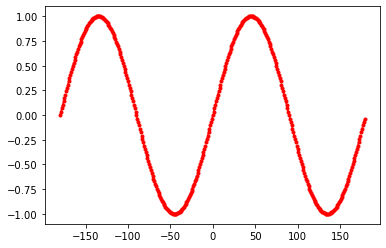

In [75]:
# First, we create an axes object:
ax = plt.axes()
# Now we make a line plot in that axes by using the plot method of that axes object:
ax.plot(lon, data1d, marker='.', linestyle='--', color='r', label='1d data')

Just for curiosity, let us see the type of ax:

In [76]:
type(ax)

matplotlib.axes._subplots.AxesSubplot

Such a `matplotlib.axes._subplots.AxesSubplot` object, is a typical object that is used for plotting all kind of data.

You can add much more stuff to the plot by using dedicated methods of the axes object:

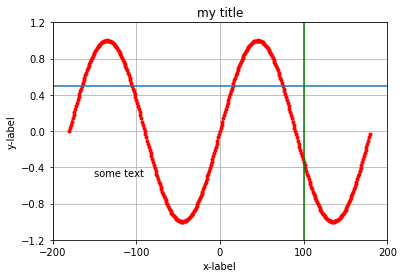

In [84]:
ax = plt.axes()
ax.plot(lon, data1d, marker='.', linestyle='--', color='r', label='1d data')
ax.set_xlabel('x-label')
ax.set_ylabel('y-label')
ax.set_title('my title')
ax.set_xlim(-200,200)
ax.set_ylim(-1.2,1.2)
ax.set_xticks(np.arange(-200,300,100))
ax.set_yticks(np.arange(-1.2,1.6,0.4))

ax.axhline(0.5)
ax.axvline(100, color='g')
ax.text(-150, -0.5, 'some text')
ax.grid(True)

### 2d plots

Text(0.5, 1.0, 'Plotting data2d')

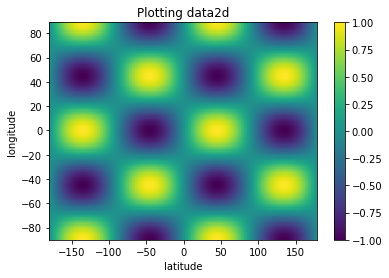

In [88]:
ax = plt.axes()
hm = ax.pcolormesh(lon, lat, data2d, vmin=-1, vmax=1)
plt.colorbar(mappable=hm)
ax.set_xlabel('latitude')
ax.set_ylabel('longitude')
ax.set_title('Plotting data2d')

### Plotting on a triangular grid

To plot data on a triangular grid, we first create some random data which will act as the vertices of our grid and the corresponding data to that:

In [115]:
lon_rand = 360.*(np.random.rand(200)-0.5)
lat_rand = 180.*(np.random.rand(200)-0.5)
data_rand = np.sin(lon_rand*np.pi/180.*2.)*np.cos(lat_rand*np.pi/180.*4.)

Now, we create a matplotlib triangulation object of all the points. Therefore, we need to include the module `matplotlib` directly (note that we only included the subset `matplotlib.pyplot` above). Note that for the ICON grid, we will use the Triangulation function a bit different since the ICON grid is well defined and we have already all the information to connect the triangles while in this example, we have only random points so far. However, for this example, the random grid is enough.

In [116]:
import matplotlib
Tri = matplotlib.tri.Triangulation(lon_rand, lat_rand)

Finally, we can plot the data by using `tripcolor`. To better visualize the grid, we also plot the vertices by using the `scatter` function.

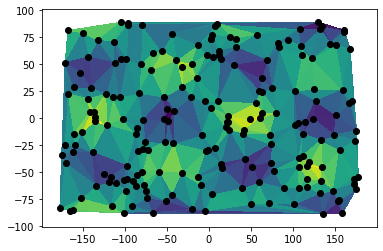

In [117]:
ax = plt.axes()
ax.tripcolor(Tri, data_rand)
ax.scatter(lon_rand, lat_rand, color='k')

## Cartopy

Cartopy can be used together with matplotlib to make nice plots which include land masks etc. We start with a basic plot:

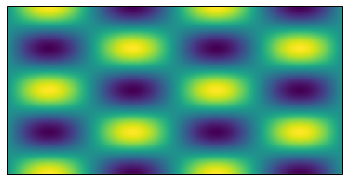

In [89]:
ccrs_proj = cartopy.crs.PlateCarree()
ax = plt.axes(projection=ccrs_proj)
ax.pcolormesh(lon, lat, data2d, vmin=-1, vmax=1, transform=ccrs_proj)

Now, we make it a bit nicer:

Text(0.5, 1.0, 'Plotting data2d')

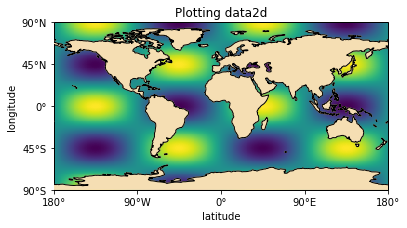

In [96]:
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

ccrs_proj = cartopy.crs.PlateCarree()
ax = plt.axes(projection=ccrs_proj)
ax.pcolormesh(lon, lat, data2d, vmin=-1, vmax=1, transform=ccrs_proj)

# x/y ticks
ax.set_xticks(np.linspace(-180,180,5), crs=ccrs_proj)
ax.set_yticks(np.linspace(-90,90,5), crs=ccrs_proj)
ax.xaxis.set_major_formatter(LongitudeFormatter())
ax.yaxis.set_major_formatter(LatitudeFormatter())

# land mask
ax.add_feature(cartopy.feature.LAND, zorder=5, facecolor='wheat')
ax.add_feature(cartopy.feature.COASTLINE, zorder=5, edgecolor='k')

# labels
ax.set_xlabel('latitude')
ax.set_ylabel('longitude')
ax.set_title('Plotting data2d')

Of course, we can also plot our triangular data on the map:

Text(0.5, 1.0, 'Plotting data2d')

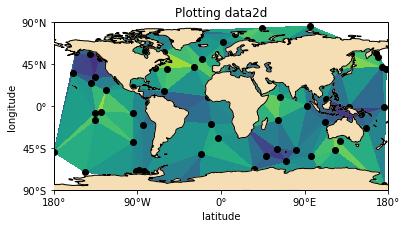

In [111]:
ccrs_proj = cartopy.crs.PlateCarree()
ax = plt.axes(projection=ccrs_proj)
ax.tripcolor(Tri, data_rand, vmin=-1, vmax=1, transform=ccrs_proj)
ax.scatter(lon_rand, lat_rand, color='k')

# x/y ticks
ax.set_xticks(np.linspace(-180,180,5), crs=ccrs_proj)
ax.set_yticks(np.linspace(-90,90,5), crs=ccrs_proj)
ax.xaxis.set_major_formatter(LongitudeFormatter())
ax.yaxis.set_major_formatter(LatitudeFormatter())

# land mask
ax.add_feature(cartopy.feature.LAND, zorder=5, facecolor='wheat')
ax.add_feature(cartopy.feature.COASTLINE, zorder=5, edgecolor='k')

# labels
ax.set_xlabel('latitude')
ax.set_ylabel('longitude')
ax.set_title('Plotting data2d')

## Pyicon

While pyicon is intended to be used for plotting ICON data. There are some plotting functions which can make plotting much more efficient. These functions are basically wrappers which make use of matplotlib/cartopy functions. So first, we import pyicon:

In [113]:
import pyicon as pyic

Now, we can use pyicon by first setting up a grid of axes with a colorbar and then doing two plots for data on a regular and on a triangular grid.

Text(0.5, 1.0, 'second plot')

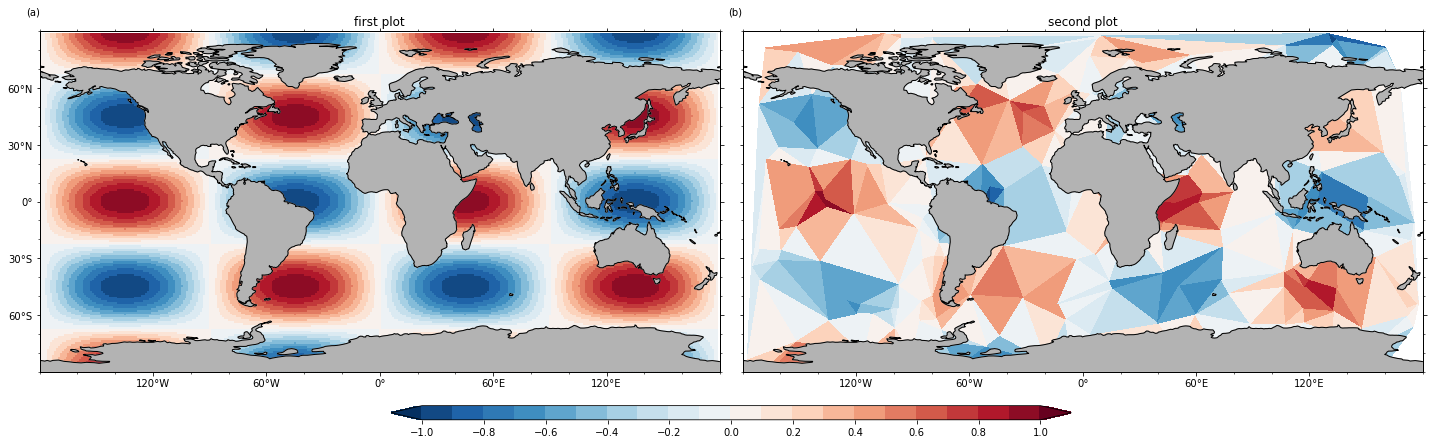

In [118]:
# a grid of axes can be created by:
hca, hcb = pyic.arrange_axes(2,1, asp=0.5, plot_cb='bottom',
                       sharex=True, sharey=True,
                       #xlabel=xlabel, ylabel=ylabel,
                       projection=ccrs_proj,
                       fig_size_fac=3.,
                       )
ii=-1 # initialize pannel counter

# 
# for each plot, the line:  ii+=1; ax=hca[ii]; cax=hcb[ii] means:
#  * ii is incremented by 1 
#  * the axes and colorbar axes objects are taken from the lists hca and hcb, respectively
# the line: hm = pyic.shade(...) is doing the plot
# the line: pyic.plot_settings(...) is making the plot nicer by adding land masks, handling ticks etc.

ii+=1; ax=hca[ii]; cax=hcb[ii]
hm = pyic.shade(lon, lat, data2d, ax=ax, cax=cax, clim=[-1,1], cincr=0.1, transform=ccrs_proj)
pyic.plot_settings(ax=ax, projection=ccrs_proj, template='global')
ax.set_title('first plot')

ii+=1; ax=hca[ii]; cax=hcb[ii]
hm = pyic.shade(Tri, data_rand, ax=ax, cax=cax, clim=[-1,1], cincr=0.1, transform=ccrs_proj)
pyic.plot_settings(ax=ax, projection=ccrs_proj, template='global')
ax.set_title('second plot')